In [ ]:
!pip install distance

     |████████████████████████████████| 180 kB 9.4 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16276 sha256=9fee8b38f18d97c4f6d0c5cc4ba0cdf2df6b879bf3744f7dc79ca04e2b2d2ff3
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install scikit-learn 

In [ ]:
!pip install mlrose

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
# Importing the required libraries

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
pd.options.display.max_columns = None

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from subprocess import check_output

# Configure visualisations
%matplotlib inline

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
# NLP
import spacy
import distance
import time
import warnings
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')
from string import punctuation
from tqdm import tqdm
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

import datetime as dt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Quora Question Training Dataset.csv')

In [ ]:
# Top 5 rows of the data
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# Checking for null values
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

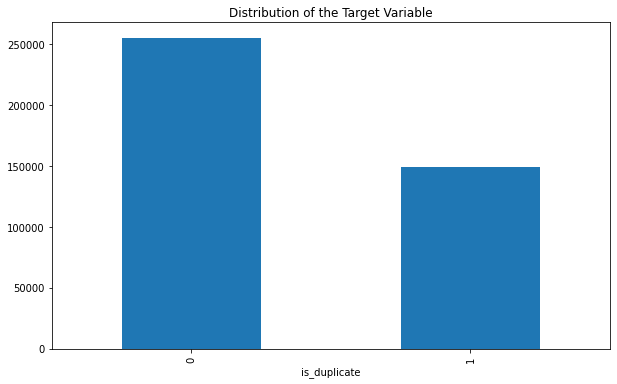

In [ ]:
# Plot showing the distribution of the target variable with in the dataset.
plt.figure(figsize=(10, 6))
plt.title("Distribution of the Target Variable")
data.groupby("is_duplicate")['id'].count().plot.bar()
plt.show()

In [ ]:
# Unique Questions with in the columns 'qid1' & 'qid2'
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of Unique Questions are: {}\n'.format(unique_qs))

Total number of Unique Questions are: 537933



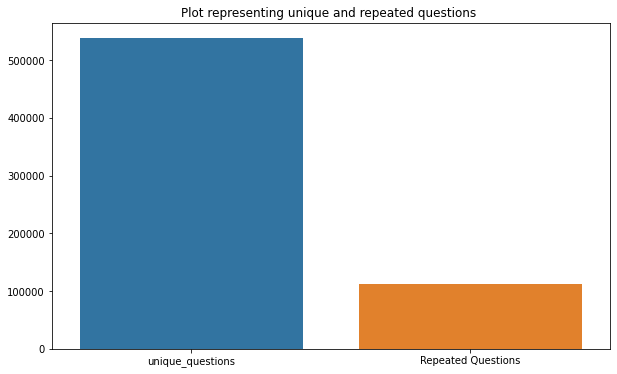

In [ ]:
# Plot showing the Unique and Repeated questions
x = ["unique_questions" , "Repeated Questions"]
y = [unique_qs , qs_morethan_onetime]
plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions ")
sns.barplot(x,y)
plt.show()

In [ ]:
# Extracting the null rows from the data
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [ ]:
# Filling the null values with ' '
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print (nan_rows)


Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [ ]:
# Data before text preprocessing
for i in range(0,20):
    print(data.question1[i])
    print(data.question2[i])
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?

Should I buy tiago?
What keeps childern active and far from phone and video games?

How can I be a good geologist?
What should I do to be a great geologist?

When do you use シ instea

In [ ]:
# Text Preprocessing 

# Cleaning text in question

SPECIAL_TOKENS = {'non-ascii': 'non_ascii_word'}

# Normalizing the text by using function

def normalized_text(text, remove_stopwords=True, stem_words=True, lemma=True):
    def pad_str(s):
        return ' '+s+' '
    
    # Empty question
    
    if type(text) != str or text=='':  # If text type is not string.
        return ''

    # Cleaning the text : Rephrasing 

    text = re.sub("\'s", " ", text) # We have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly.
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE) # Replace whats by what is and ignore case.
    text = re.sub("\'ve", " have ", text) # Replace 've by have
    text = re.sub("can't", "can not", text) # Replace can't by can not
    text = re.sub("n't", " not ", text) # Replace n't by not
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE) # Replace i'm by i am and ignore case
    text = re.sub("\'re", " are ", text) # Replace 're by are
    text = re.sub("\'d", " would ", text) # Replace 'd by would
    text = re.sub("\'ll", " will ", text) # Replace 'll by will
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE) # Replace e.g. by eg and ignore case
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE) # Replace b.g. by bg and ignore case
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text) 
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE) # Replace e-mail by email
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # Remove comma between numbers, i.e. 15,000 -> 15000

    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    
    text = re.sub('\$', " dollar ", text) # Replace $ by dollar
    text = re.sub('\%', " percent ", text) # Replace % by percent
    text = re.sub('\&', " and ", text) # Replace & by and
    
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) 
    
    # Indian Currency

    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    
    # Contracting the text

    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text) 
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE) 
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE) 
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)
    
    # Replace the float numbers with a random number
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
  
    # Removing Punctuations
    text = [word for word in text if word not in punctuation]
    text = ''.join(text)
    
    # Lower Casing
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        text = [w for w in text if not w in stop_words]
    
    text = " ".join(text)
    # Stemming
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)

    # Lemmatization
    if lemma:
        lemmer = WordNetLemmatizer()
        lemmatized_words = [lemmer.lemmatize(word) for word in text]
        text = "".join(lemmatized_words)
    
    # Return a list of words
    return text


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Applying text cleaning function to question text

data['question1'] = data['question1'].apply(normalized_text)
data['question2'] = data['question2'].apply(normalized_text)

In [ ]:
# Data after text preprocessing
for i in range(0,20):
    print(data.question1[i])
    print(data.question2[i])
    print()

step step guid invest share market india
step step guid invest share market

stori kohinoor kohinoor diamond
would happen indian govern stole kohinoor kohinoor diamond back

increas speed internet connect use vpn
internet speed increas hack dns

mental lone solv
find remaind math2324math divid 2423

one dissolv water quik sugar salt methan carbon di oxid
fish would surviv salt water

astrolog capricorn sun cap moon cap risingwhat say
tripl capricorn sun moon ascend capricorn say

buy tiago
keep childern activ far phone video game

good geologist
great geologist

use nonasciiword instead nonasciiword
use instead

motorola compani hack charter motorolla dcx3400
hack motorola dcx3400 free internet

method find separ slit use fresnel biprism
thing technician tell durabl reliabl laptop compon

read find youtub comment
see youtub comment

make physic easi learn
make physic easi learn

first sexual experi like
first sexual experi

law chang status student visa green card us compar immigr law 

#### Extracting  new features from given dataset

- freq_qid1 = Frequency of qid1's
- freq_qid2 = Frequency of qid2's
- q1_char_len = Characters count in question1
- q2_char_len = Characters count in question2
- q1_word_len = Words count in question1
- q2_word_len = Words count in question2
- total_word_len = Total words count in question 1 &2
- words_common = Number of common unique words in Question 1 and Question 2
- word_share = (word_common)/(total_word_len)
- freq_q1+freq_q2 = sum of the frequency of qid1 and qid2

In [ ]:
# Feature Extraction
# Safe div to avoid division by 0 exception
safe_div = 0.0001
# Freq of qid1
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 

# Freq of qid2
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')

# Characters count in question1
data['q1_char_len'] = data['question1'].str.len() 

# Characters count in question2
data['q2_char_len'] = data['question2'].str.len()

# Words count in question1
data['q1_word_len'] = data['question1'].apply(lambda row: len(row.split(" ")))

# Words count in question2
data['q2_word_len'] = data['question2'].apply(lambda row: len(row.split(" ")))

# Total words count in question 1 &2
data['total_word_len'] = data['q1_word_len'] + data['q2_word_len']

stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This']
        
# Stop words in q1 and q2
q1_stops = set([word for word in data['question1'] if word in stop_words])
q2_stops = set([word for word in data['question2'] if word in stop_words])
common_stops = q1_stops & q2_stops
  
# Common words
q1_words = set(data['question1'])
q2_words = set(data['question2'])
common_words = q1_words & q2_words

# Words_common
data['common_words'] = len(common_words) * 1.0

# Words_shared
data['words_shared'] = data['common_words'] / (data['total_word_len'] + safe_div)

# Creating freq_q1+freq_q2 column
data["freq_q1+freq_q2"] = data["freq_qid1"] + data["freq_qid2"]

In [ ]:
# Checking for the changes made
data.head(30)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_char_len,q2_char_len,q1_word_len,q2_word_len,total_word_len,common_words,words_shared,freq_q1+freq_q2
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,1,1,40,34,7,6,13,63044.0,4849.501158,2
1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0,4,1,31,63,4,9,13,63044.0,4849.501158,5
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dns,0,1,1,38,31,6,5,11,63044.0,5731.220625,2
3,3,7,8,mental lone solv,find remaind math2324math divid 2423,0,1,1,16,36,3,5,8,63044.0,7880.401495,2
4,4,9,10,one dissolv water quik sugar salt methan carbo...,fish would surviv salt water,0,3,1,55,28,10,5,15,63044.0,4202.905314,4
5,5,11,12,astrolog capricorn sun cap moon cap risingwhat...,tripl capricorn sun moon ascend capricorn say,1,1,1,50,45,8,7,15,63044.0,4202.905314,2
6,6,13,14,buy tiago,keep childern activ far phone video game,0,1,1,9,40,2,7,9,63044.0,7004.811058,2
7,7,15,16,good geologist,great geologist,1,1,1,14,15,2,2,4,63044.0,15760.605985,2
8,8,17,18,use nonasciiword instead nonasciiword,use instead,0,1,2,37,11,4,2,6,63044.0,10507.158214,3
9,9,19,20,motorola compani hack charter motorolla dcx3400,hack motorola dcx3400 free internet,0,1,1,47,35,6,5,11,63044.0,5731.220625,2


In [ ]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1_char_len', 'q2_char_len', 'q1_word_len',
       'q2_word_len', 'total_word_len', 'common_words', 'words_shared',
       'freq_q1+freq_q2'],
      dtype='object')

#### freq_qid1

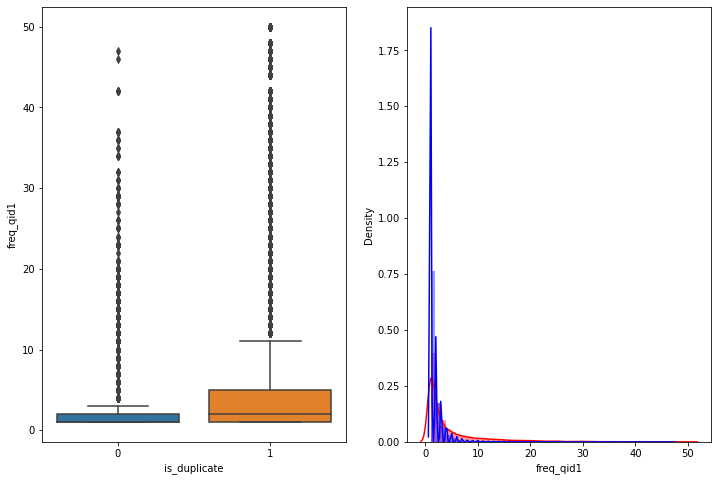

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_qid1', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['freq_qid1'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['freq_qid1'][0:] , label = "0" , color = 'blue' )
plt.show()

- Frequency of qid1 was high at 1.
- Maximum value of Similar questions was higher than Non-Similar questions.
- We have more no of Similar questions for freq_qid1

#### freq_qid2

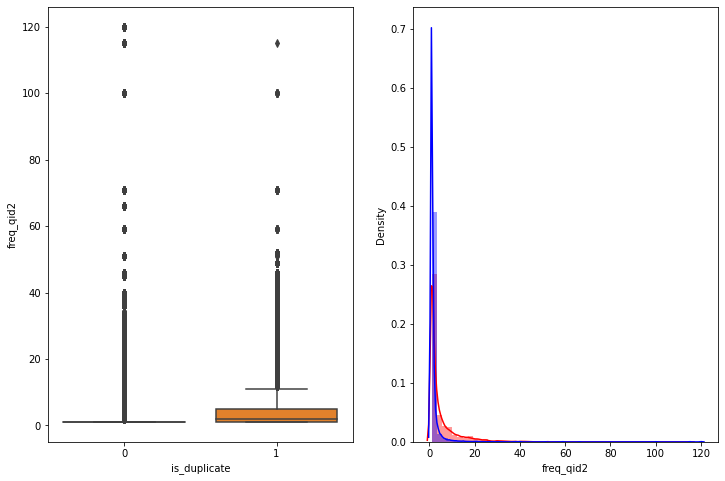

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_qid2', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['freq_qid2'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['freq_qid2'][0:] , label = "0" , color = 'blue' )
plt.show()

#### q1_char_len

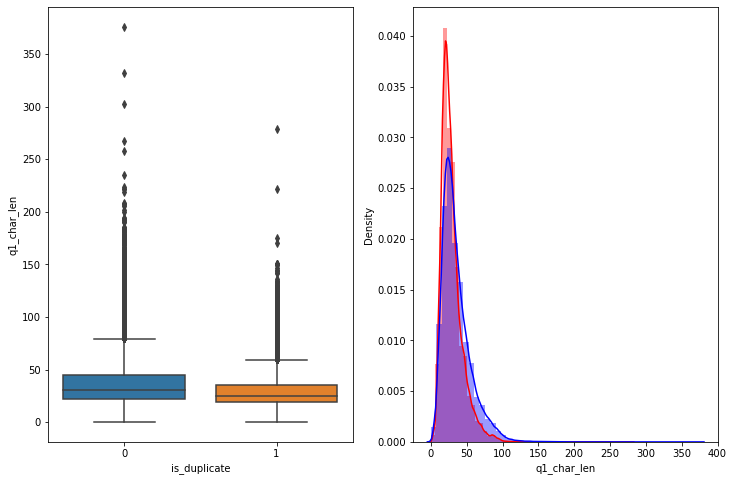

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1_char_len', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['q1_char_len'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['q1_char_len'][0:] , label = "0" , color = 'blue' )
plt.show()

- No of characters in question1 is more than question2 for Non-Similar questions.
- The length of characters in question1 was high at 30 (approx)

#### q2_char_len

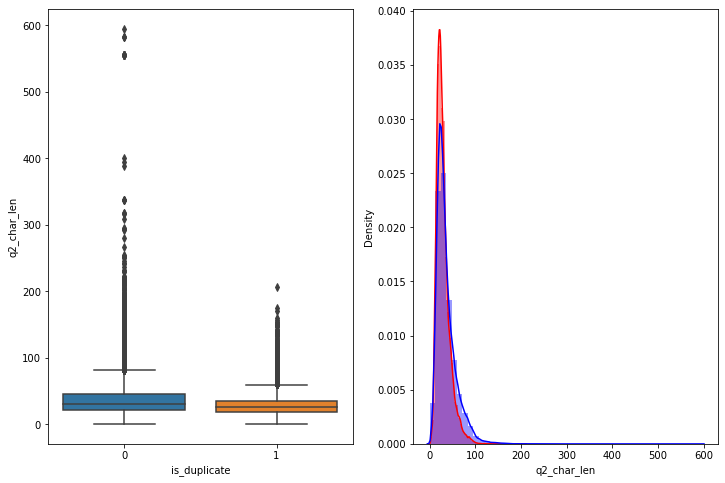

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q2_char_len', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['q2_char_len'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['q2_char_len'][0:] , label = "0" , color = 'blue' )
plt.show()

- Minimum characters of q2 is same for both Non-Similar questions & Similar questions.
- Mean of no of characters of q2 are almost same for both Similar & Non-Similar questions.

#### q1_word_len

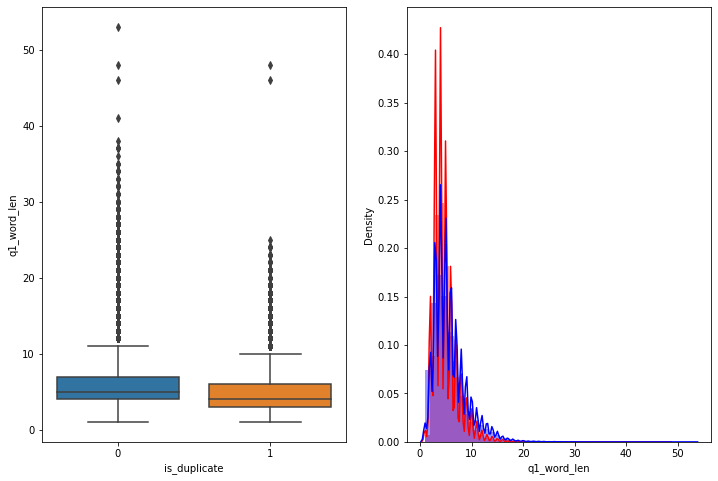

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1_word_len', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['q1_word_len'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['q1_word_len'][0:] , label = "0" , color = 'blue' )
plt.show()

- The 75 percentile of the Similar questions was overlapping with the 25 percentile of Non-Similar questions.

#### q2_word_len

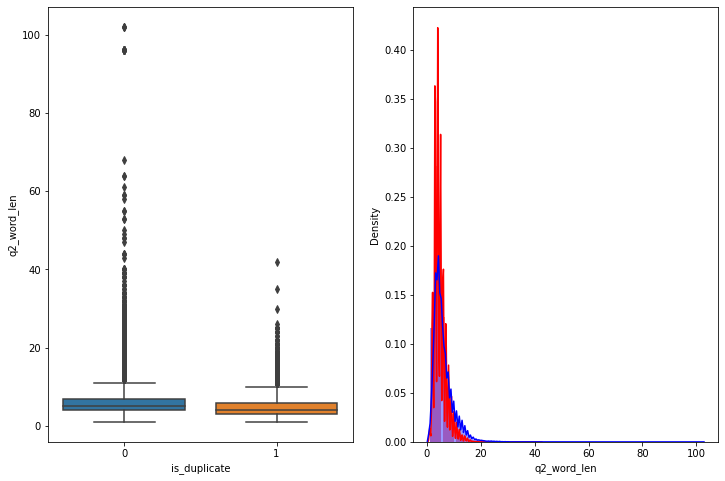

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q2_word_len', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['q2_word_len'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['q2_word_len'][0:] , label = "0" , color = 'blue' )
plt.show()

- Mean of no of words of q2 are almost same for both Similar & Non-Similar questions.

#### total_word_len

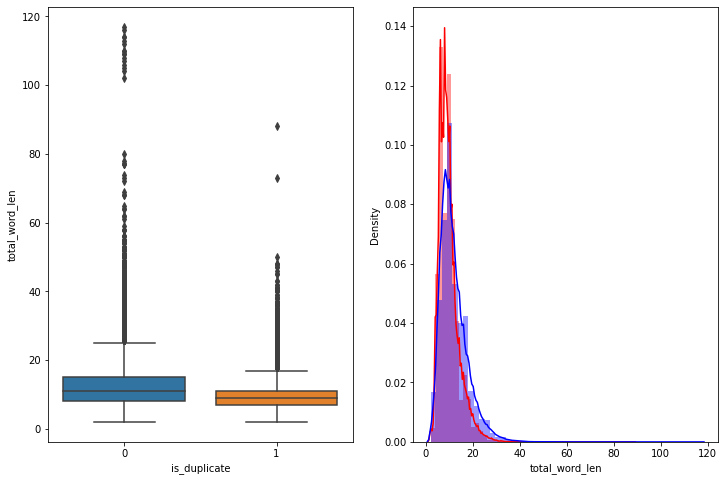

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'total_word_len', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['total_word_len'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['total_word_len'][0:] , label = "0" , color = 'blue' )
plt.show()

- The maximum no of total words for Non-Similar questions is more than the Similar questions.

#### common_words

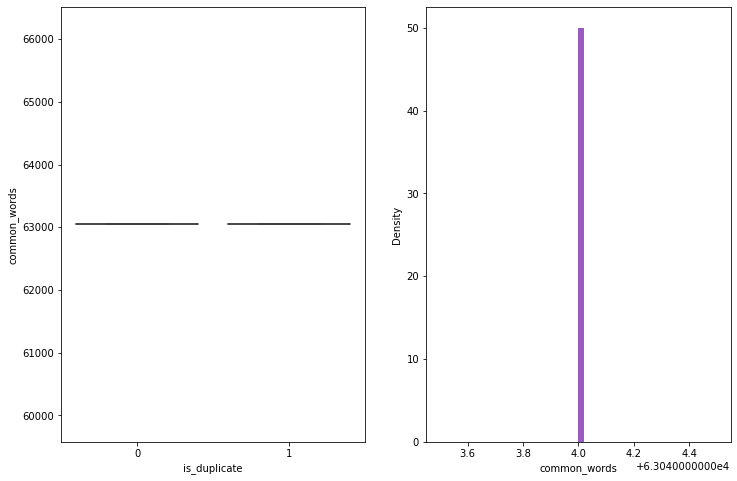

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'common_words', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['common_words'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['common_words'][0:] , label = "0" , color = 'blue' )
plt.show()

- We were having the same value for the common words i.e 63044.

#### words_shared

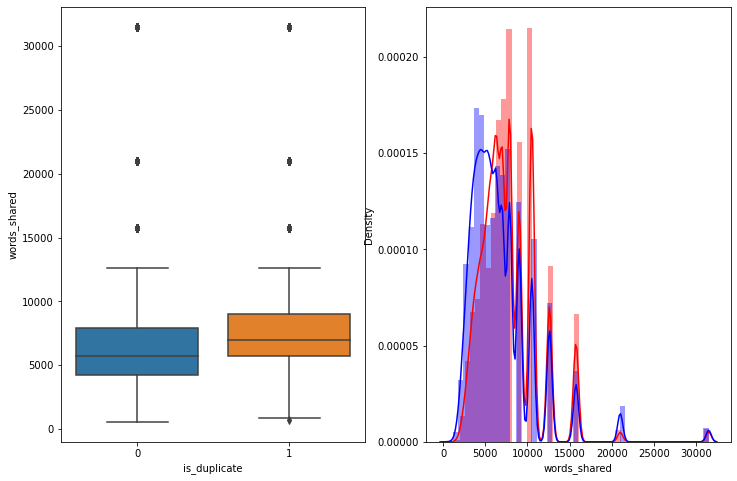

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'words_shared', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['words_shared'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['words_shared'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions of the words_shared feature in Similar and Non-Similar questions are highly overlapping.

#### freq_q1 + freq_q2

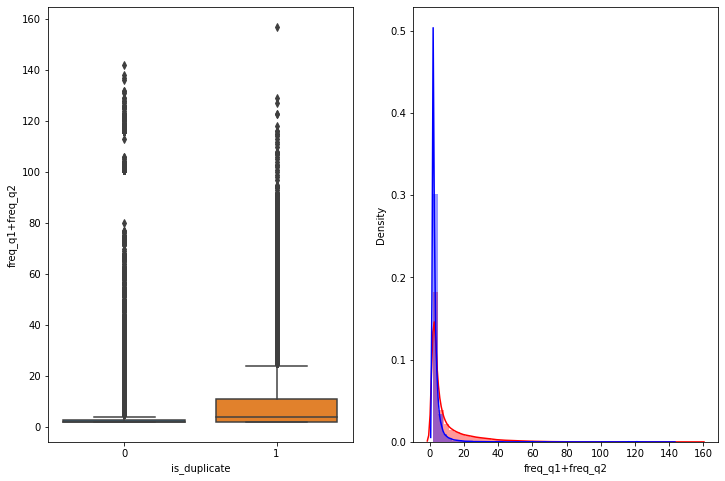

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'freq_q1+freq_q2', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['freq_q1+freq_q2'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['freq_q1+freq_q2'][0:] , label = "0" , color = 'blue' )
plt.show()

- The density is low for Similar questions compared with Non-Similar questions.

In [ ]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(data):
    # preprocessing each question
    data["question1"] = data["question1"].fillna("").apply(normalized_text)
    data["question2"] = data["question2"].fillna("").apply(normalized_text)

    print("token features...")

    token_features = data.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    data["cwc_min"]       = list(map(lambda x: x[0], token_features))
    data["cwc_max"]       = list(map(lambda x: x[1], token_features))
    data["csc_min"]       = list(map(lambda x: x[2], token_features))
    data["csc_max"]       = list(map(lambda x: x[3], token_features))
    data["ctc_min"]       = list(map(lambda x: x[4], token_features))
    data["ctc_max"]       = list(map(lambda x: x[5], token_features))
    data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    data["first_word_eq"] = list(map(lambda x: x[7], token_features))
    data["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    data["mean_len"]      = list(map(lambda x: x[9], token_features))

    print("fuzzy features..")

    data["token_set_ratio"]       = data.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    data["token_sort_ratio"]      = data.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    data["fuzz_ratio"]            = data.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    data["fuzz_partial_ratio"]    = data.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return data

In [ ]:
SAFE_DIV = 0.0001 

In [ ]:
STOP_WORDS = stopwords.words("english")

In [ ]:
print("Extracting features for train:")
data = pd.read_csv('/content/drive/My Drive/Quora Question Training Dataset.csv')
data = extract_features(data)
data.to_csv('/content/drive/My Drive/nlp_features_train.csv', index=False)
data.head()

Extracting features for train:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.999980,0.833319,0.0,0.0,0.833319,0.714276,0.0,1.0,1.0,6.5,100,92,92,100,0.971429
1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0,0.666644,0.249997,0.0,0.0,0.499988,0.222220,0.0,0.0,5.0,6.5,84,62,62,94,0.812500
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dns,0,0.599988,0.499992,0.0,0.0,0.599988,0.499992,0.0,0.0,1.0,5.5,83,70,46,44,0.281250
3,3,7,8,mental lone solv,find remaind math2324math divid 2423,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,4.0,19,19,23,25,0.058824
4,4,9,10,one dissolv water quik sugar salt methan carbo...,fish would surviv salt water,0,0.399992,0.199998,0.0,0.0,0.399992,0.199998,0.0,0.0,5.0,7.5,53,43,24,50,0.206897


Analysis of extracted features

**Word cloud**

Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
We can observe the most frequent occuring words

In [ ]:
df_duplicate = data[data['is_duplicate'] == 1]
dfp_nonduplicate = data[data['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [ ]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 8939404
Total number of words in non duplicate pair questions : 18734589


Word Clouds generated from duplicate pair question's text

Word Cloud for Duplicate Question pairs


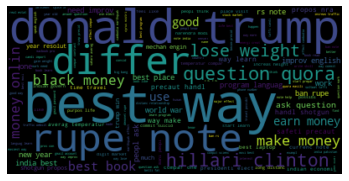

In [ ]:
wc = WordCloud(background_color="black", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-duplicate Questions

Word Cloud for Non-Duplicate Question pairs


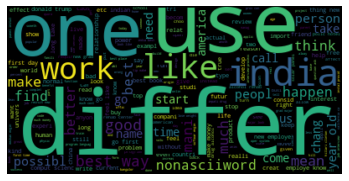

In [ ]:
wc = WordCloud(background_color="black", max_words=len(textn_w), stopwords=stopwords)
wc.generate(textn_w)
print ("Word Cloud for Non-Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

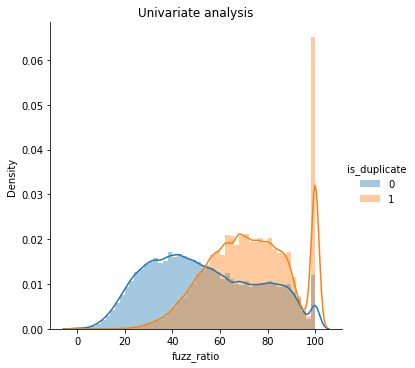

In [ ]:
sns.FacetGrid(data, hue="is_duplicate", size=5) \
.map(sns.distplot,"fuzz_ratio") \
.add_legend();
plt.title('Univariate analysis')
plt.ylabel("Density")
plt.show();

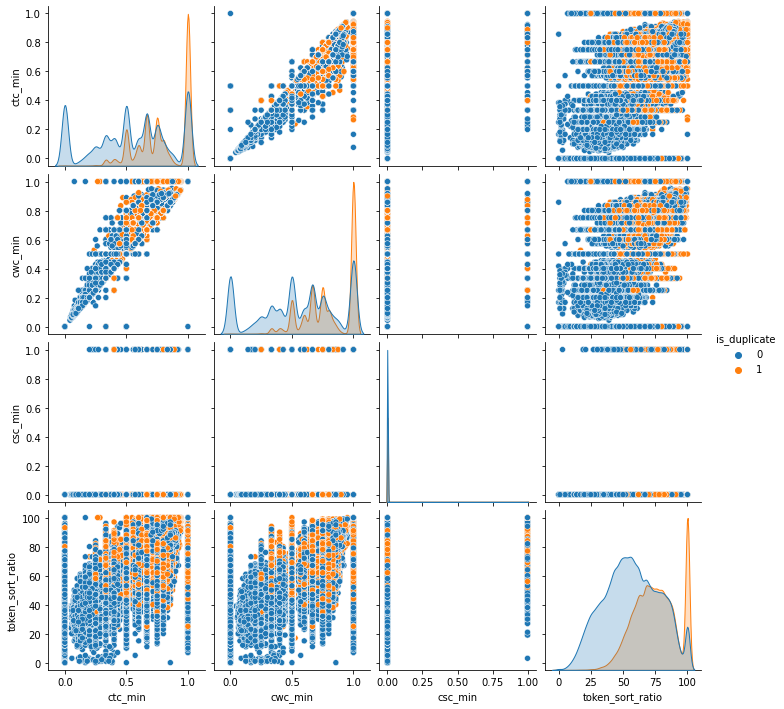

In [ ]:
n = data.shape[0]
sns.pairplot(data[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

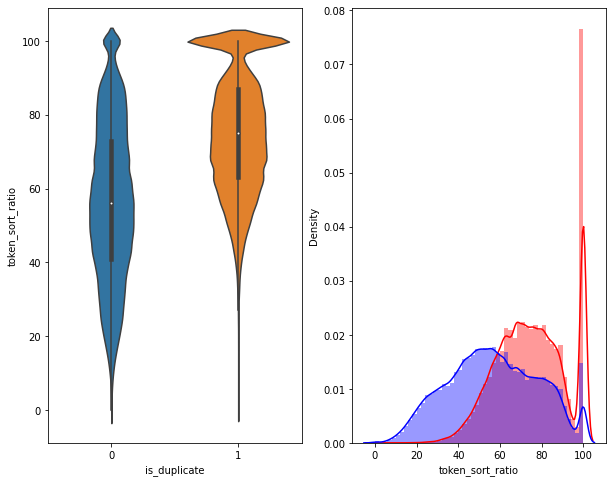

In [ ]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

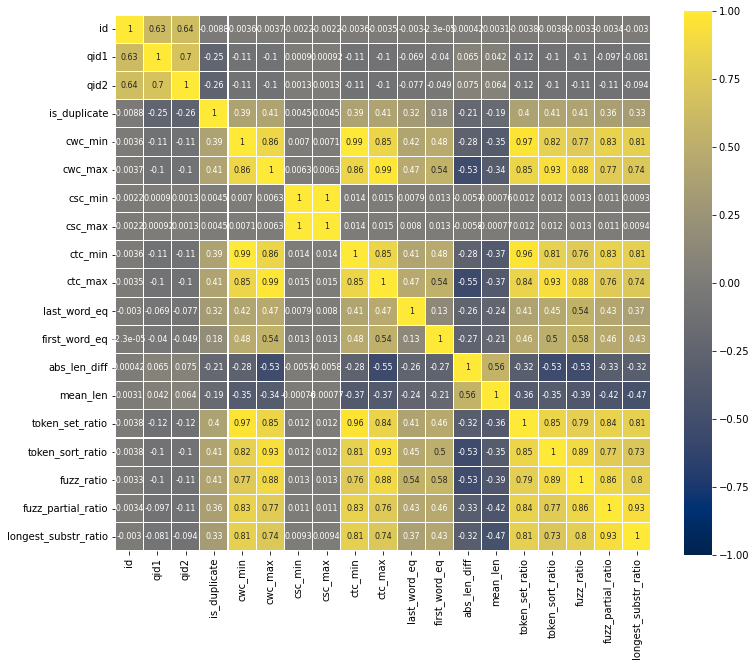

In [ ]:
corr = data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='cividis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

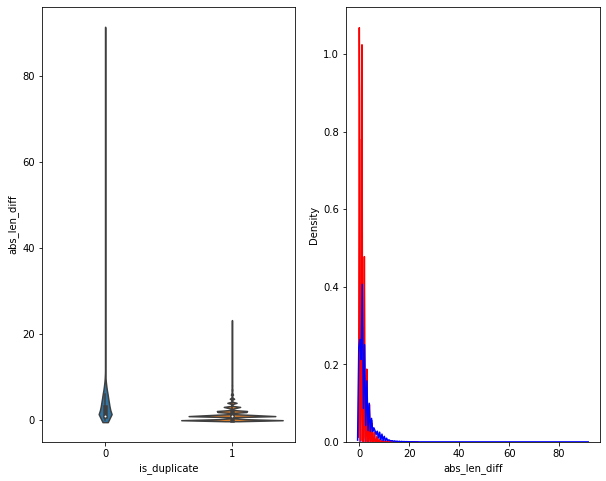

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'abs_len_diff', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['abs_len_diff'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['abs_len_diff'][0:] , label = "0" , color = 'blue' )
plt.show()

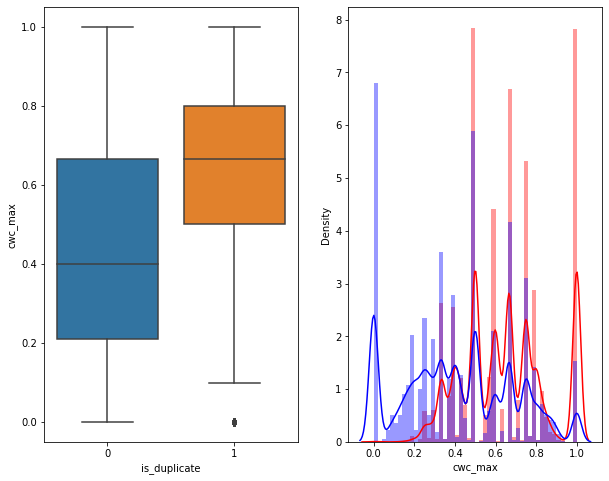

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'cwc_max', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['cwc_max'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['cwc_max'][0:] , label = "0" , color = 'blue' )
plt.show()

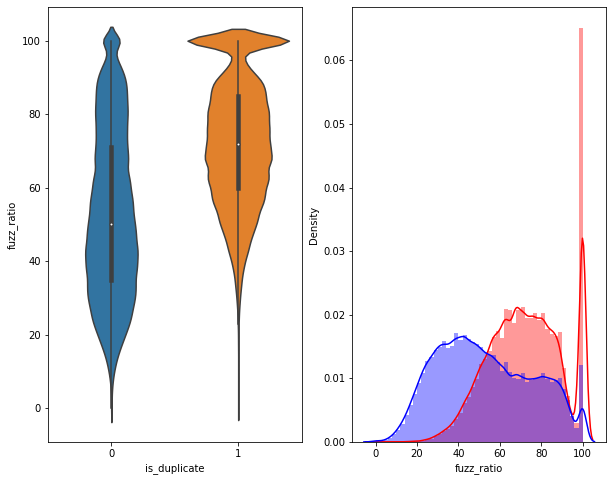

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Quora Question Training Dataset.csv')

In [ ]:
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
here we use a pre-trained GLOVE model which comes free with "Spacy". https://spacy.io/usage/vectors-similarity
It is trained on Wikipedia and therefore, it is stronger in terms of word semantics.

In [ ]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += (vec1 * idf)
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)

100%|██████████| 404290/404290 [1:09:34<00:00, 96.84it/s]


In [ ]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += (vec2 * idf)
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 404290/404290 [1:10:42<00:00, 95.29it/s]


In [ ]:
dfnlp = pd.read_csv("/content/drive/My Drive/nlp_features_train.csv",encoding='latin-1')
dfppro = pd.read_csv("/content/drive/My Drive/Quora Question Training Dataset.csv",encoding='latin-1')

In [ ]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [ ]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 1
Number of features in question1 w2v  dataframe : 96
Number of features in question2 w2v  dataframe : 96
Number of features in final dataframe  : 210


In [ ]:
df3_q1['id']=df1['id']
df3_q2['id']=df1['id']
df1  = df1.merge(df2, on='id',how='left')
df2  = df3_q1.merge(df3_q2, on='id',how='left')
result  = df1.merge(df2, on='id',how='left')
result.to_csv('/content/drive/My Drive/final_features.csv')

In [ ]:
data = result.copy()
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
# data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)
data.drop(['id','is_duplicate'], axis=1, inplace=True)

In [ ]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,40_x,41_x,42_x,43_x,44_x,45_x,46_x,47_x,48_x,49_x,50_x,51_x,52_x,53_x,54_x,55_x,56_x,57_x,58_x,59_x,60_x,61_x,62_x,63_x,64_x,65_x,66_x,67_x,68_x,69_x,70_x,71_x,72_x,73_x,74_x,75_x,76_x,77_x,78_x,79_x,80_x,81_x,82_x,83_x,84_x,85_x,86_x,87_x,88_x,89_x,90_x,91_x,92_x,93_x,94_x,95_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,51_y,52_y,53_y,54_y,55_y,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.666644,0.249997,0.0,0.0,0.499988,0.222220,0.0,0.0,5.0,6.5,84,62,62,94,0.812500,9.236668,-80.371416,-45.785907,78.291656,183.568221,100.894077,74.344804,48.360802,127.297421,112.987302,73.449294,-47.164479,31.560610,-77.927155,-103.803116,-78.503396,11.997354,73.522302,-3.368269,-61.134586,1.137853,-47.250332,-14.747230,-111.214488,-92.936345,-86.908993,26.479862,-125.349442,53.630314,-118.244944,-19.311728,4.184269,37.147654,-32.207492,54.693156,-146.564649,190.351235,-50.185377,-102.660014,-62.070884,121.661338,-2.404011,11.355296,-132.850811,-22.969309,-39.625917,-10.420729,-34.440314,-10.694507,155.053370,129.572944,-148.089205,4.047402,2.554648,-159.126332,100.650429,69.116646,123.042798,2.978409,-52.171842,-77.587376,-43.825259,-2.570918,25.001977,74.528037,55.402768,53.763126,-27.621300,-62.024373,67.296625,-127.672300,5.919581,51.888908,5.646263,-52.011487,-22.036677,150.269148,-19.587007,-46.445237,-12.489538,104.020920,-83.863392,-11.340908,26.339330,16.131961,137.782501,-32.130515,-98.080325,19.113790,-20.507508,-76.981011,82.665075,41.085582,129.377781,115.868467,4.383543,-3.565742,-16.844571,-130.911785,0.320254,79.350278,23.562028,79.124551,84.119839,128.684135,279.539877,51.329233,-47.977027,124.322700,-106.766716,-35.756386,-119.277429,21.692362,79.320570,-30.874480,-86.451965,-75.311001,-10.504030,-54.459205,-82.283126,-122.537507,-23.897150,38.062149,-120.668866,96.555255,-172.800629,71.174992,52.399280,-3.790546,-88.446559,-1.359644,-169.229485,242.162139,-106.348765,-118.454241,-81.356276,134.278376,61.833982,19.326437,-126.900878,100.640926,12.382760,37.245324,-37.719706,23.165720,55.512874,89.774096,-128.745806,77.115026,21.342439,-226.793965,31.565503,190.348300,114.510458,-79.321841,-65.284250,-69.147191,-111.427223,18.650104,15.329342,43.115542,31.039919,49.603525,-26.932295,-54.213027,98.597791,-72.848590,87.272756,2.563240,-12.326506,-50.862417,19.058227,180.085690,-79.230389,-49.612403,-2.875509,12.640813,-205.569995,-46.432224,86.927369,2.640828,-2.350201,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,0.599988,0.499992,0.0,0.0,0.599988,0.499992,0.0,0.0,1.0,5.5,83,70,46,44,0.281250,97.546829,22.972195,-39.558378,18.723416,56.928620,48.307643,8.719268,36.893737,106.899948,226.283080,-5.023025,-68.019793,-52.865684,-112.794187,49.411453,4.386397,-23.508985,3.867846,-19.287308,-52.332033,59.900114,102.718565,-6.070379,-47.957186,-51.316635,26.235306,-71.297170,-82.694041,61.166595,-59.661620,85.192997,95.725261,-9.786940,-44.572019,-26.737537,-8.913334,67.037574,-85.818559,-137.332815,-58.704829,152.365096,-30.987197,-43.664234,-107.024094,-3.492005,-23.984314,69.762900,-28.339251,-51.681255,-36.345922,143.847958,-100.765187,-45.994606,-18.875071,-200.002180,71.497623,126.969506,32.991508,11.751381,32.921630,127.876085,-117.452091,-53.69789

In [ ]:
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y
50_y
51_y
52_y
53_y
54_y
55_y
56_y
57_y
58_y
59_y
60_y
61_y
62_y
63_y
64_y
65_y
66_y
67_y
68_y
69_y
70_y
71_y

In [ ]:
y_true = list(map(int, y_true.values))

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283002, 207)
Number of data points in test data : (121287, 207)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308011957512668 Class 1:  0.36919880424873325
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("red")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Building a random model (Finding worst-case log-loss)

Log loss on Test Data using Random Model 0.8800712071526281


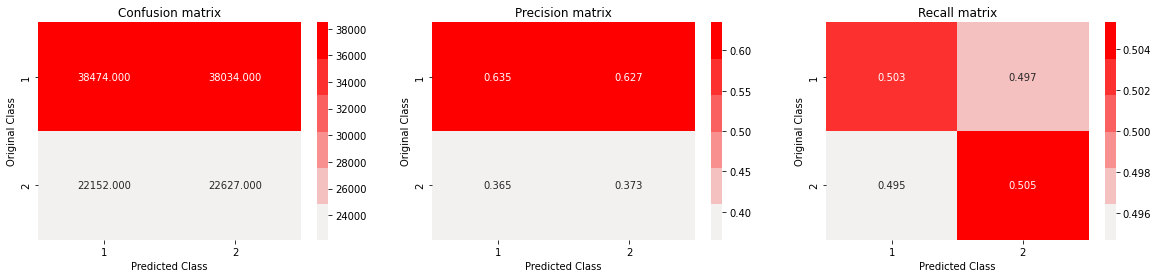

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.5424167941476922
For values of alpha =  0.0001 The log loss is: 0.5480607107437611
For values of alpha =  0.001 The log loss is: 0.5437143597501503
For values of alpha =  0.01 The log loss is: 0.530881821258263
For values of alpha =  0.1 The log loss is: 0.5402318024175463
For values of alpha =  1 The log loss is: 0.5523031690160014
For values of alpha =  10 The log loss is: 0.5547625842562762


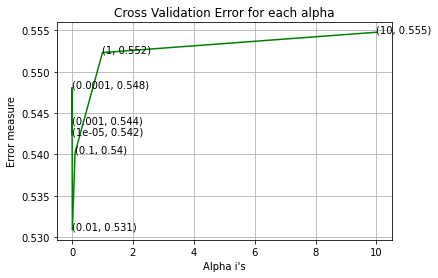

For values of best alpha =  0.01 The train log loss is: 0.5308942502794716
For values of best alpha =  0.01 The test log loss is: 0.530881821258263
Total number of data points : 121287


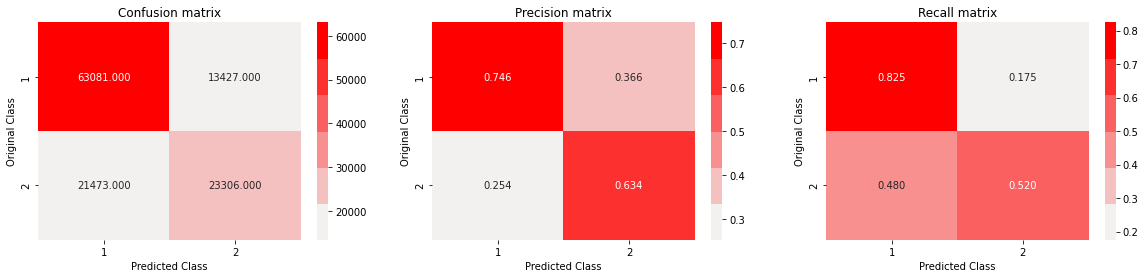

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Linear SVM

For values of alpha =  1e-05 The log loss is: 0.5483696702832684
For values of alpha =  0.0001 The log loss is: 0.5397946256797962
For values of alpha =  0.001 The log loss is: 0.5459685513133998
For values of alpha =  0.01 The log loss is: 0.536393508821136
For values of alpha =  0.1 The log loss is: 0.5742374290628615
For values of alpha =  1 The log loss is: 0.6464591565195311
For values of alpha =  10 The log loss is: 0.6553533028608144


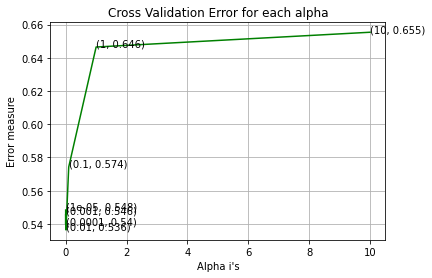

For values of best alpha =  0.01 The train log loss is: 0.5359036524279245
For values of best alpha =  0.01 The test log loss is: 0.536393508821136
Total number of data points : 121287


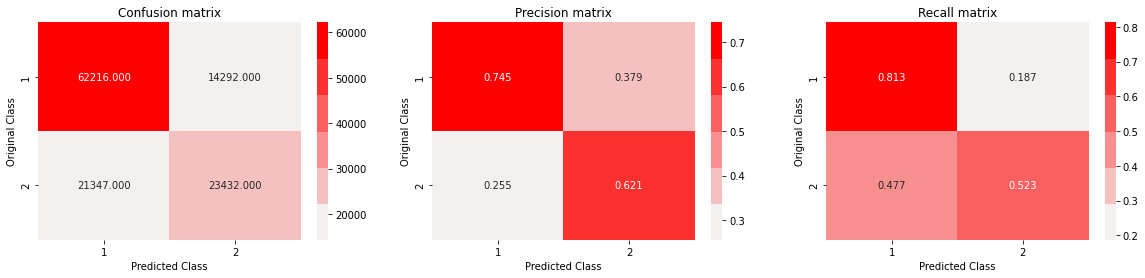

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy ',accuracy)

Accuracy  0.6748208794017496


In [ ]:
from sklearn.metrics import accuracy_score
predicted = sig_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy ',accuracy)

Accuracy  0.7061597698022047


XGBoost

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.686918	valid-logloss:0.687261
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.640329	valid-logloss:0.640053
[20]	train-logloss:0.606755	valid-logloss:0.606505
[30]	train-logloss:0.58228	valid-logloss:0.581861
[40]	train-logloss:0.563823	valid-logloss:0.563408
[50]	train-logloss:0.549507	valid-logloss:0.549036
[60]	train-logloss:0.538279	valid-logloss:0.537828
[70]	train-logloss:0.529349	valid-logloss:0.528991
[80]	train-logloss:0.522254	valid-logloss:0.521847
[90]	train-logloss:0.51662	valid-logloss:0.516349
[100]	train-logloss:0.511945	valid-logloss:0.511763
[110]	train-logloss:0.508027	valid-logloss:0.507876
[120]	train-logloss:0.504579	valid-logloss:0.504569
[130]	train-logloss:0.5018	valid-logloss:0.501878
[140]	train-logloss:0.49931	valid-logloss:0.49949
[150]	train-logloss:0.497235	valid-logloss:0.497433
[160]	train-logloss:0.495238	valid

Total number of data points : 121287


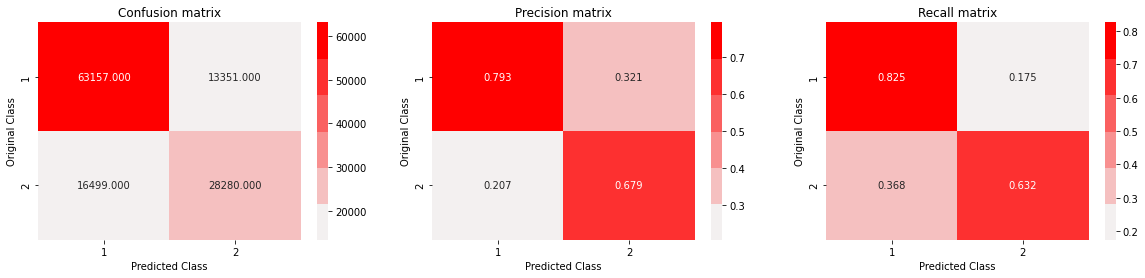

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Conclusion

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.title = " Model Comparision "
x.field_names = ['Model', 'Various tokenizer','hyperparameter Tunning', 'train log loss ','test Log Loss']
x.add_row(["Random model","TFIDF","NA","NA","0.8871"])
x.add_row(["Logistic Regression","TFIDF","Done","0.53","0.53"])
x.add_row(["Linear SVM","TFIDF","Done","0.54","0.54"])
x.add_row(["xgboost","TFIDF","Done","0.68","0.47"])
print(x)

+----------------------------------------------------------------------------------------------------+
|                                         Model Comparision                                          |
+---------------------+-------------------+------------------------+-----------------+---------------+
|        Model        | Various tokenizer | hyperparameter Tunning | train log loss  | test Log Loss |
+---------------------+-------------------+------------------------+-----------------+---------------+
|     Random model    |       TFIDF       |           NA           |        NA       |     0.8871    |
| Logistic Regression |       TFIDF       |          Done          |       0.53      |      0.53     |
|      Linear SVM     |       TFIDF       |          Done          |       0.54      |      0.54     |
|       xgboost       |       TFIDF       |          Done          |       0.68      |      0.47     |
+---------------------+-------------------+------------------------+-----